In [1]:
set.seed(624) #ONLY WRITE THIS ONCE

library(tidyverse)
library(dplyr)
library(repr)
library(tidymodels)
library(repr)
library(tidymodels)

# Libraries with functions needed are loaded and the seed is set to allow for the analysis to be reproducible

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
options(repr.matrix.max.rows= 8)

Expected_Years_of_Schooling_vs_HDI<- read_tsv("https://raw.githubusercontent.com/MarranaTT/Group_46_Final_Project/main/Expected_years%20of%20schooling_(years).tsv",
    col_names = FALSE, skip =6)%>%
    slice(1:(n()-9))%>%
        select(X1:X62)%>%
        filter(X1 != "NA")
Expected_Years_of_Schooling_vs_HDI


#The raw data was read in, and edited so that it had a structure from which we could start to make it tidy. 
# The data alterations included skipping/getting rid of rows, choosing only certain columns, 
# an excluding any values that were not pertinent to our analysis.

Parsed with column specification:
cols(
  .default = col_character(),
  X4 = col_logical(),
  X6 = col_logical(),
  X8 = col_logical(),
  X10 = col_logical(),
  X12 = col_logical(),
  X14 = col_logical(),
  X16 = col_logical(),
  X18 = col_logical(),
  X20 = col_logical(),
  X22 = col_logical(),
  X24 = col_logical(),
  X26 = col_logical(),
  X28 = col_logical(),
  X30 = col_logical(),
  X32 = col_logical(),
  X34 = col_logical(),
  X36 = col_logical(),
  X38 = col_logical(),
  X40 = col_logical(),
  X42 = col_logical()
  # ... with 9 more columns
)

See spec(...) for full column specifications.



X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62
<chr>,<chr>,<chr>,<lgl>,<chr>,<lgl>,<chr>,<lgl>,<chr>,<lgl>,⋯,<chr>,<lgl>,<chr>,<lgl>,<chr>,<lgl>,<chr>,<lgl>,<chr>,<chr>
HDI Rank,Country,1990,NA,1991,NA,1992,NA,1993,NA,⋯,2015,NA,2016,NA,2017,NA,2018,NA,2019,NA
169,Afghanistan,2.6,NA,2.9,NA,3.2,NA,3.6,NA,⋯,10.2,NA,10.3,NA,10.1,NA,10.1,NA,10.2,a
69,Albania,11.6,NA,11.8,NA,10.7,NA,10.1,NA,⋯,15.1,NA,14.8,NA,14.8,NA,14.7,NA,14.7,a
91,Algeria,9.6,NA,9.7,NA,9.8,NA,9.8,NA,⋯,14.2,NA,14.2,NA,14.4,NA,14.5,NA,14.6,a
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
117,Viet Nam,7.8,NA,8.1,NA,8.4,NA,8.7,NA,⋯,12.7,NA,12.7,NA,12.7,NA,12.7,NA,12.7,"a,d"
179,Yemen,7.5,NA,7.5,NA,7.6,NA,7.6,NA,⋯,8.7,NA,8.7,NA,8.7,NA,8.7,NA,8.8,"a,d"
146,Zambia,7.5,NA,7.7,NA,8.0,NA,8.2,NA,⋯,11.1,NA,11.2,NA,11.3,NA,11.4,NA,11.5,"a,c"
150,Zimbabwe,9.8,NA,10.2,NA,9.8,NA,9.8,NA,⋯,10.3,NA,10.4,NA,10.5,NA,10.5,NA,11.0,"a,h"


The data table presented above is the result of reading in our HDI and Years of Schooling Data from the respective data source. The data is not tidy because although each value is a single cell, each row is not a single observation and each column is not a single variable. 

The col_names argument was given the logical statement FALSE as there are no column names in the original dataframe. The last 9 rows were then omitted using the slice function, which was followed by selecting the first 62 columns of the dataframe, and then deleting any NA values found within the first row since this will ensure that only country names are found in the first row (no invalid "values"). 

In [3]:
EYS_vs_HDI <- Expected_Years_of_Schooling_vs_HDI[, colSums(is.na(Expected_Years_of_Schooling_vs_HDI)) < nrow(Expected_Years_of_Schooling_vs_HDI)]

#This was done to get rid of all the columns that had NA as values for all the rows.

Invalid_Col <- c("X62")

#This was done to give the last column an object name so that it can be used in the following code:

EYS_vs_HDI_NA_Drop = EYS_vs_HDI[,!(names(EYS_vs_HDI) %in% Invalid_Col)]

EYS_vs_HDI_NA_Drop

#The result of this code returns a data frame with only 61 columns and no NA values.

X1,X2,X3,X5,X7,X9,X11,X13,X15,X17,⋯,X43,X45,X47,X49,X51,X53,X55,X57,X59,X61
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,1997,⋯,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
169,Afghanistan,2.6,2.9,3.2,3.6,3.9,4.2,4.6,4.9,⋯,9.5,9.5,10.0,10.2,10.3,10.2,10.3,10.1,10.1,10.2
69,Albania,11.6,11.8,10.7,10.1,10.1,10.2,10.2,10.5,⋯,13.0,13.7,14.6,14.9,15.3,15.1,14.8,14.8,14.7,14.7
91,Algeria,9.6,9.7,9.8,9.8,9.9,9.8,10.0,10.3,⋯,14.0,14.3,13.9,13.6,14.0,14.2,14.2,14.4,14.5,14.6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
117,Viet Nam,7.8,8.1,8.4,8.7,9.0,9.3,9.6,9.0,⋯,12.0,12.5,12.6,12.6,12.7,12.7,12.7,12.7,12.7,12.7
179,Yemen,7.5,7.5,7.6,7.6,7.6,7.6,7.6,7.6,⋯,8.6,9.0,8.5,8.8,8.7,8.7,8.7,8.7,8.7,8.8
146,Zambia,7.5,7.7,8.0,8.2,8.4,8.7,8.9,9.1,⋯,11.0,10.9,10.9,11.0,11.0,11.1,11.2,11.3,11.4,11.5
150,Zimbabwe,9.8,10.2,9.8,9.8,9.8,9.8,9.8,9.8,⋯,10.1,10.2,10.3,10.2,10.3,10.3,10.4,10.5,10.5,11.0


Using the original, slightly altered data, we used a variation of functions which allowed us to get rid of any columns with NA values and also get rid of a column that had no relevance to our study. This column was omitted because it's values (letters) were used as a legend in the original data frame; we will not be using the legend in the analysis. 

In [4]:
EYS_vs_HDI_Col_ShiftUp<- EYS_vs_HDI_NA_Drop[-c(1),]
#This was done to make the first row the column names

EYS_vs_HDI_Colnames_Created <- c("HDI_Rank","Name_of_Country","1990","1991", "1992", "1993", "1994","1995", "1996", "1997", "1998","1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007",  "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015","2016", "2017", "2018", "2019")
colnames(EYS_vs_HDI_Col_ShiftUp) <- EYS_vs_HDI_Colnames_Created
#This was done to give the columns column names

EYS_vs_HDI_Tidy <- pivot_longer(EYS_vs_HDI_Col_ShiftUp, cols = "1990":"2019",
                 names_to = "Years",
                values_to = "Average_Years_of_Schooling")%>%
        select("HDI_Rank", "Name_of_Country", "Years", "Average_Years_of_Schooling")%>%
        filter(HDI_Rank != "..", Average_Years_of_Schooling != ".." )%>%
        mutate(HDI_Rank = as.numeric(HDI_Rank))%>%
        mutate(Average_Years_of_Schooling = as.numeric(Average_Years_of_Schooling))%>%
                select(-Name_of_Country,-Years)
EYS_vs_HDI_Tidy

#This step tidies the data into 2 columns (each one represents a variable) by making the data frame longer 
#(from its wide original shape).
#It allows for the exclusion of rows with ".." values
#The HDI_Rank is changed into a numerical variable which allows for further analysis.
#The columns that do not contribute to the analysis are also omitted.

HDI_Rank,Average_Years_of_Schooling
<dbl>,<dbl>
169,2.6
169,2.9
169,3.2
169,3.6
⋮,⋮
150,10.4
150,10.5
150,10.5
150,11.0


The data is now in a tidy format from which further analysis can be conducted. The resulting table has two columns: the first one being the dependent variable HDI Rank of a country as per UNDP (United Nations Development Programme) records, and the corresponding Average Years of schooling which is the independent variable of this analysis. Both of the columns are numerical values which allows for them to be visualized using a scatter plot. Additionally the three conditions for tidy data are met: each row is a single observation, each column is a single variable, and each value is a single cell.


In [5]:
EYS_vs_HDI_Tidy_Range_Classification <- EYS_vs_HDI_Tidy %>%
                    mutate(ranges = cut(HDI_Rank,breaks = c(1, 66, 119, 156, 189),labels = c("Very_High","High","Medium", "Low"), include.lowest = TRUE)) %>%
                    group_by(ranges) %>%
                    summarise(Number_of_rows= n())%>%
                    rename(HDI_ranges = ranges)
EYS_vs_HDI_Tidy_Range_Classification

#Counts the number of rows (count of HDI ranks) that have a specific value within a given range. 

`summarise()` ungrouping output (override with `.groups` argument)



HDI_ranges,Number_of_rows
<fct>,<int>
Very_High,1947
High,1519
Medium,1062
Low,956


The resulting table groups the original data of HDI ranks into four ranges: very high, high, medium and low. It counts the number of rows with a specific HDI value that falls into the ranges which we created based on research. These ranges contribute to our understanding of the distribution of the data.

In [17]:
EYS_vs_HDI_Split <- initial_split(EYS_vs_HDI_Tidy, prop = 0.75, strata = HDI_Rank)
EYS_vs_HDI_Split

EYS_vs_HDI_Train <- training(EYS_vs_HDI_Split)
EYS_vs_HDI_Train

EYS_vs_HDI_Test <- testing(EYS_vs_HDI_Split)
# The tidy data is split into training and testing sets so that regression models may be applied.

EYS_vs_HDI_Tidy_Summary <- summary(EYS_vs_HDI_Train)
EYS_vs_HDI_Tidy_Summary

# The summary results in a table that includes important information about the variables including the median and mean.

EYS_vs_HDI_Train_Count <- count(EYS_vs_HDI_Train)%>%
                        rename(Number_of_Observations = n)
EYS_vs_HDI_Train_Count

# This counts the rows in the training data so that we know how many observations we have for the analysis.

<Analysis/Assess/Total>
<4114/1370/5484>

HDI_Rank,Average_Years_of_Schooling
<dbl>,<dbl>
169,2.6
169,2.9
169,3.2
169,3.6
⋮,⋮
150,10.4
150,10.5
150,10.5
150,11.0


    HDI_Rank      Average_Years_of_Schooling
 Min.   :  1.00   Min.   : 2.10             
 1st Qu.: 47.00   1st Qu.: 9.90             
 Median : 94.00   Median :12.10             
 Mean   : 94.15   Mean   :11.85             
 3rd Qu.:142.00   3rd Qu.:14.10             
 Max.   :189.00   Max.   :23.30             

Number_of_Observations
<int>
4114


The information presented by the tables above furthers the statistical meaning of the data that was initially shown by grouping it into the four ranges. Using the mean and the median, a histogram could be created to explore in more detail the distribution, however this is not beneficial to our analysis. Regardless, it is important to acknowledge it. 

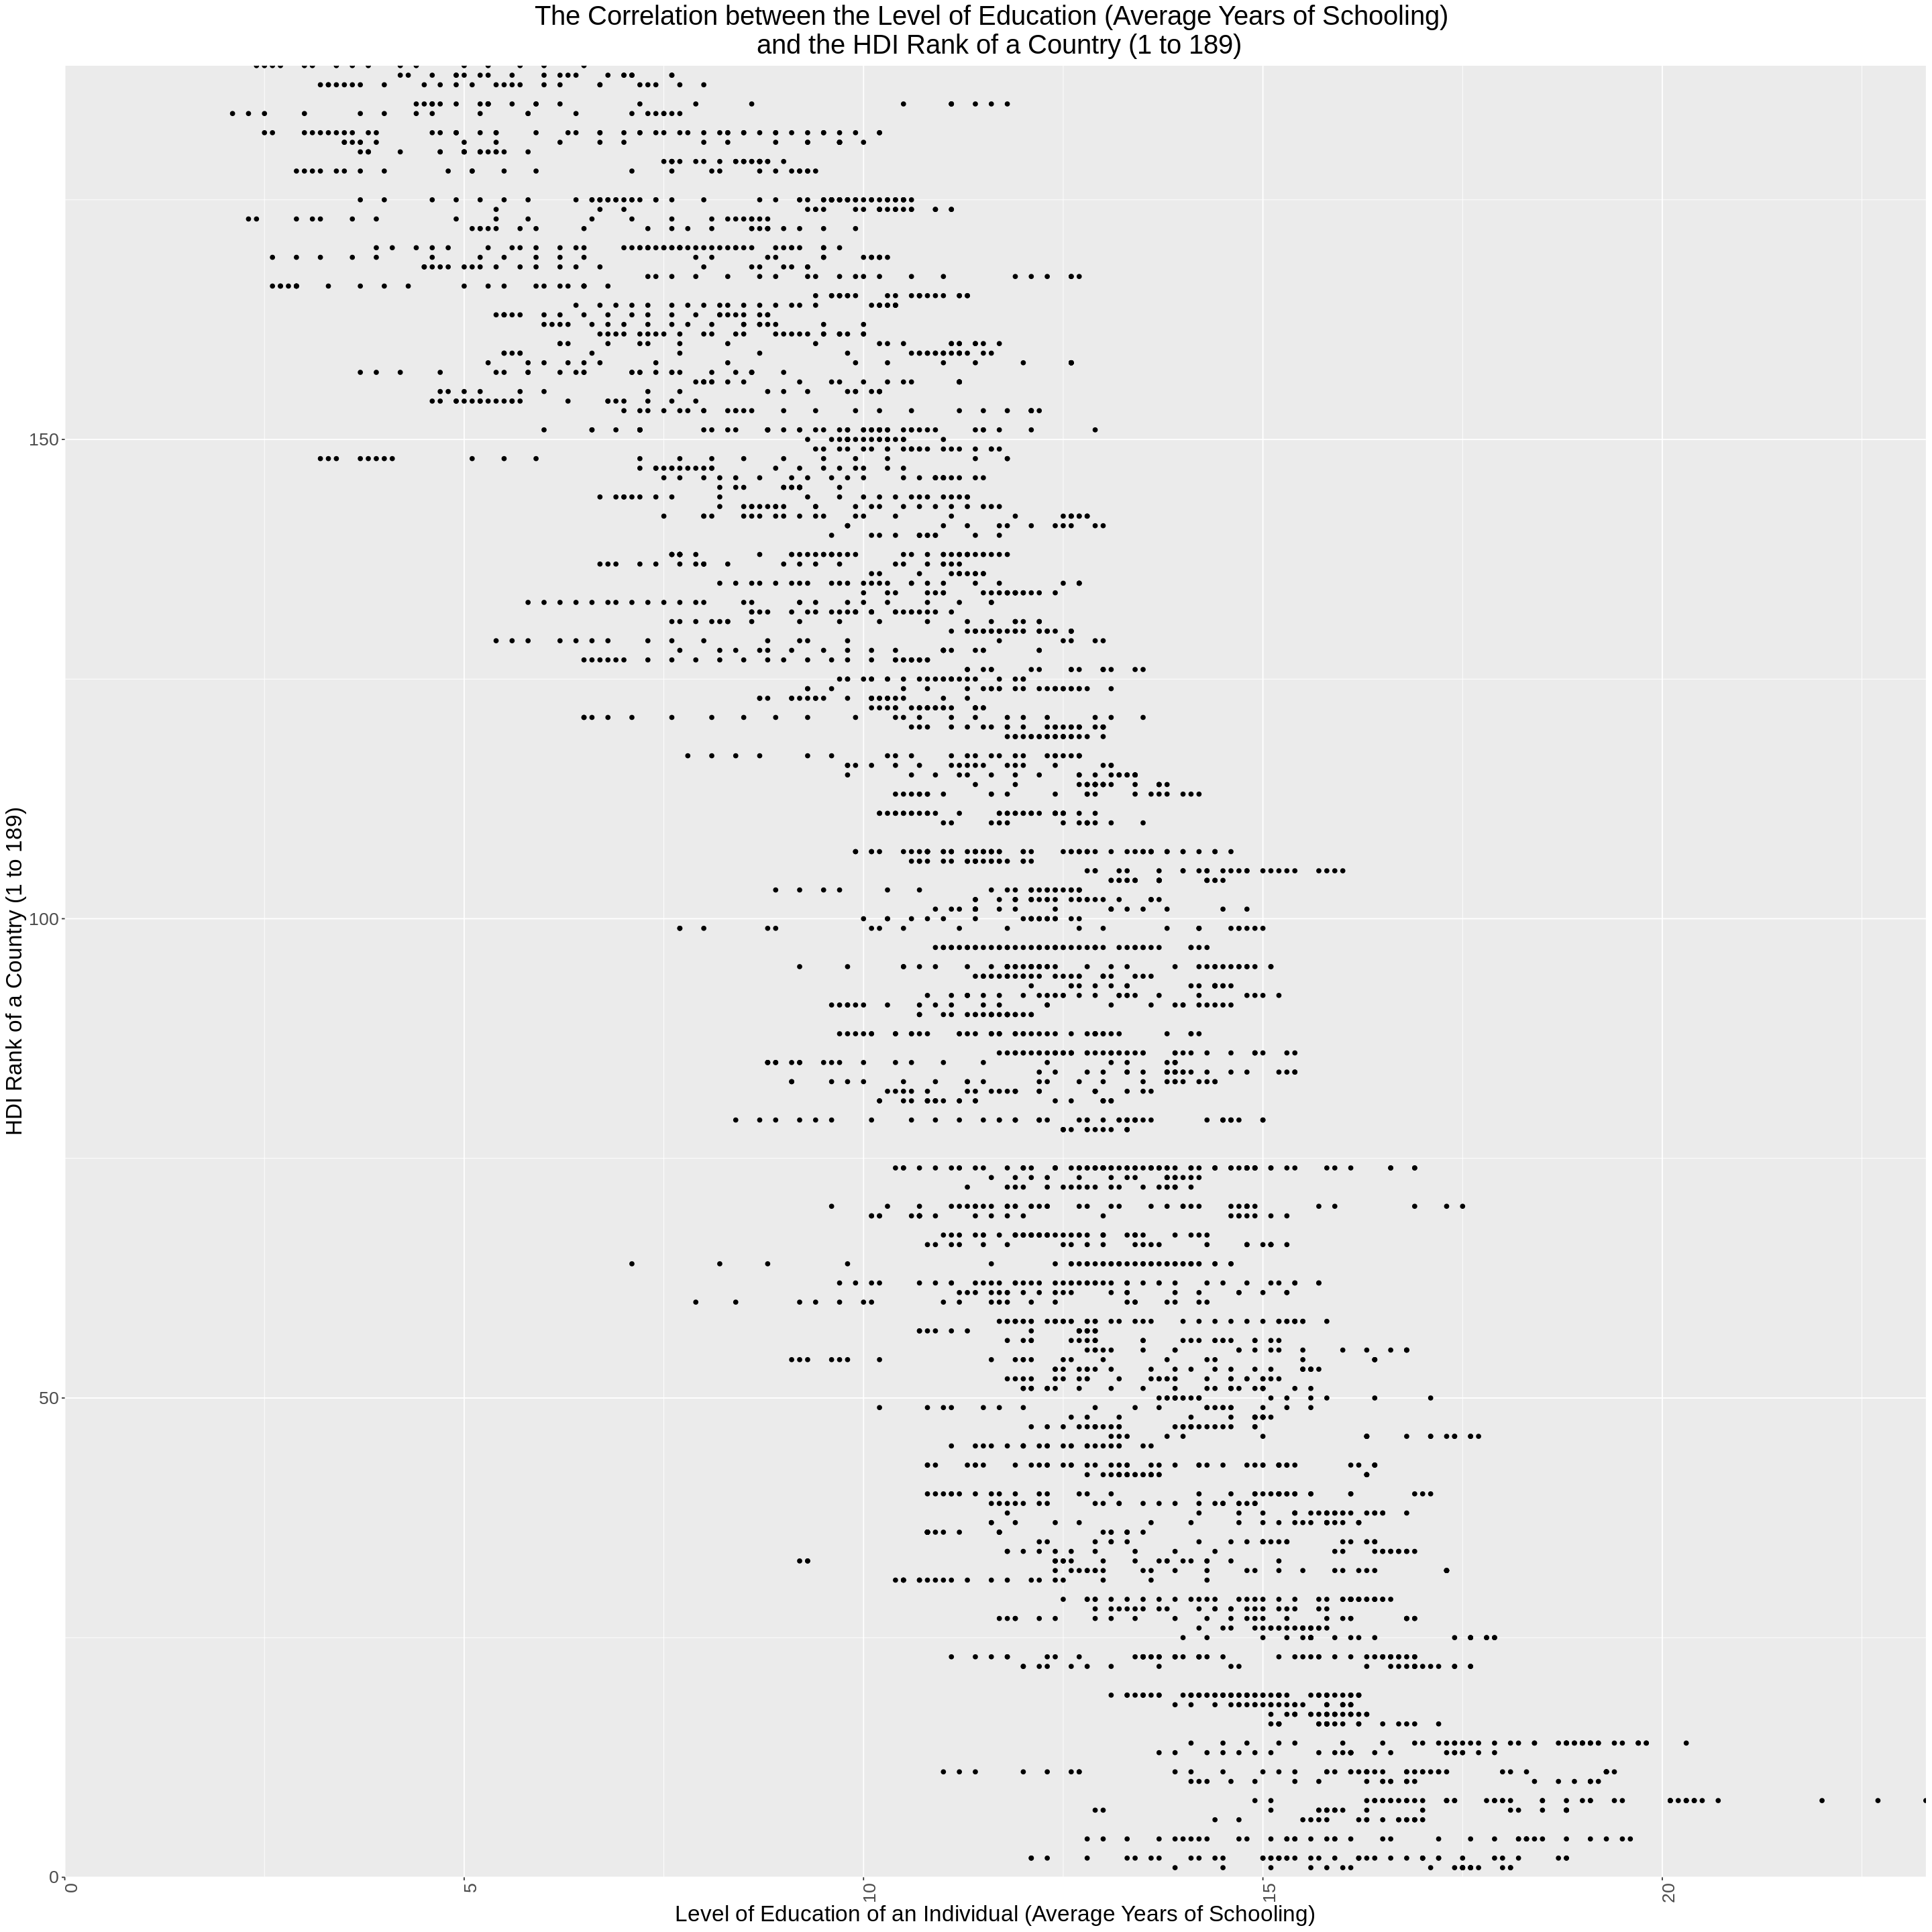

In [20]:
options(repr.plot.width=24, repr.plot.height=24)

EYS_vs_HDI_Train_Plot <- EYS_vs_HDI_Train %>%
                    ggplot(aes(x = Average_Years_of_Schooling, y = HDI_Rank))+
                    geom_point()+
                    labs(x= "Level of Education of an Individual (Average Years of Schooling)" , y = "HDI Rank of a Country (1 to 189)")+
                    ggtitle("The Correlation between the Level of Education (Average Years of Schooling) \n and the HDI Rank of a Country (1 to 189)")+
                    theme(axis.text.x = element_text(angle = 90, , hjust = 1),
                        text = element_text(size= 20))+
                    theme(plot.title = element_text(hjust = 0.5)) +
                    scale_x_continuous(expand = c(0,0), limits = c(0, NA))+
                    scale_y_continuous(expand = c(0,0), limits = c(0, NA))
EYS_vs_HDI_Train_Plot

# This plots HDI ranks (y-axis) and Average Years of Schooling (x-axis) for exploratory analysis. 

In [8]:
lm_spec <- linear_reg() %>%
           set_engine("lm") %>%
           set_mode("regression")
lm_spec

# Sets the linear regression model specification.

lm_recipe <- recipe(HDI_Rank ~ Average_Years_of_Schooling, data = EYS_vs_HDI_Train)

lm_fit <- workflow() %>%
          add_recipe(lm_recipe) %>%
          add_model(lm_spec) %>%
          fit(data = EYS_vs_HDI_Train)
lm_fit

# Creates recipe, establishes a workflow analysis and fits the linear regression model for our training dataset. 
# The equation of the line of best fit can be found based on this step of the data analysis (using Coefficients).

Linear Regression Model Specification (regression)

Computational engine: lm 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
               (Intercept)  Average_Years_of_Schooling  
                    254.63                      -13.54  


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 17 rows containing missing values (geom_smooth).”


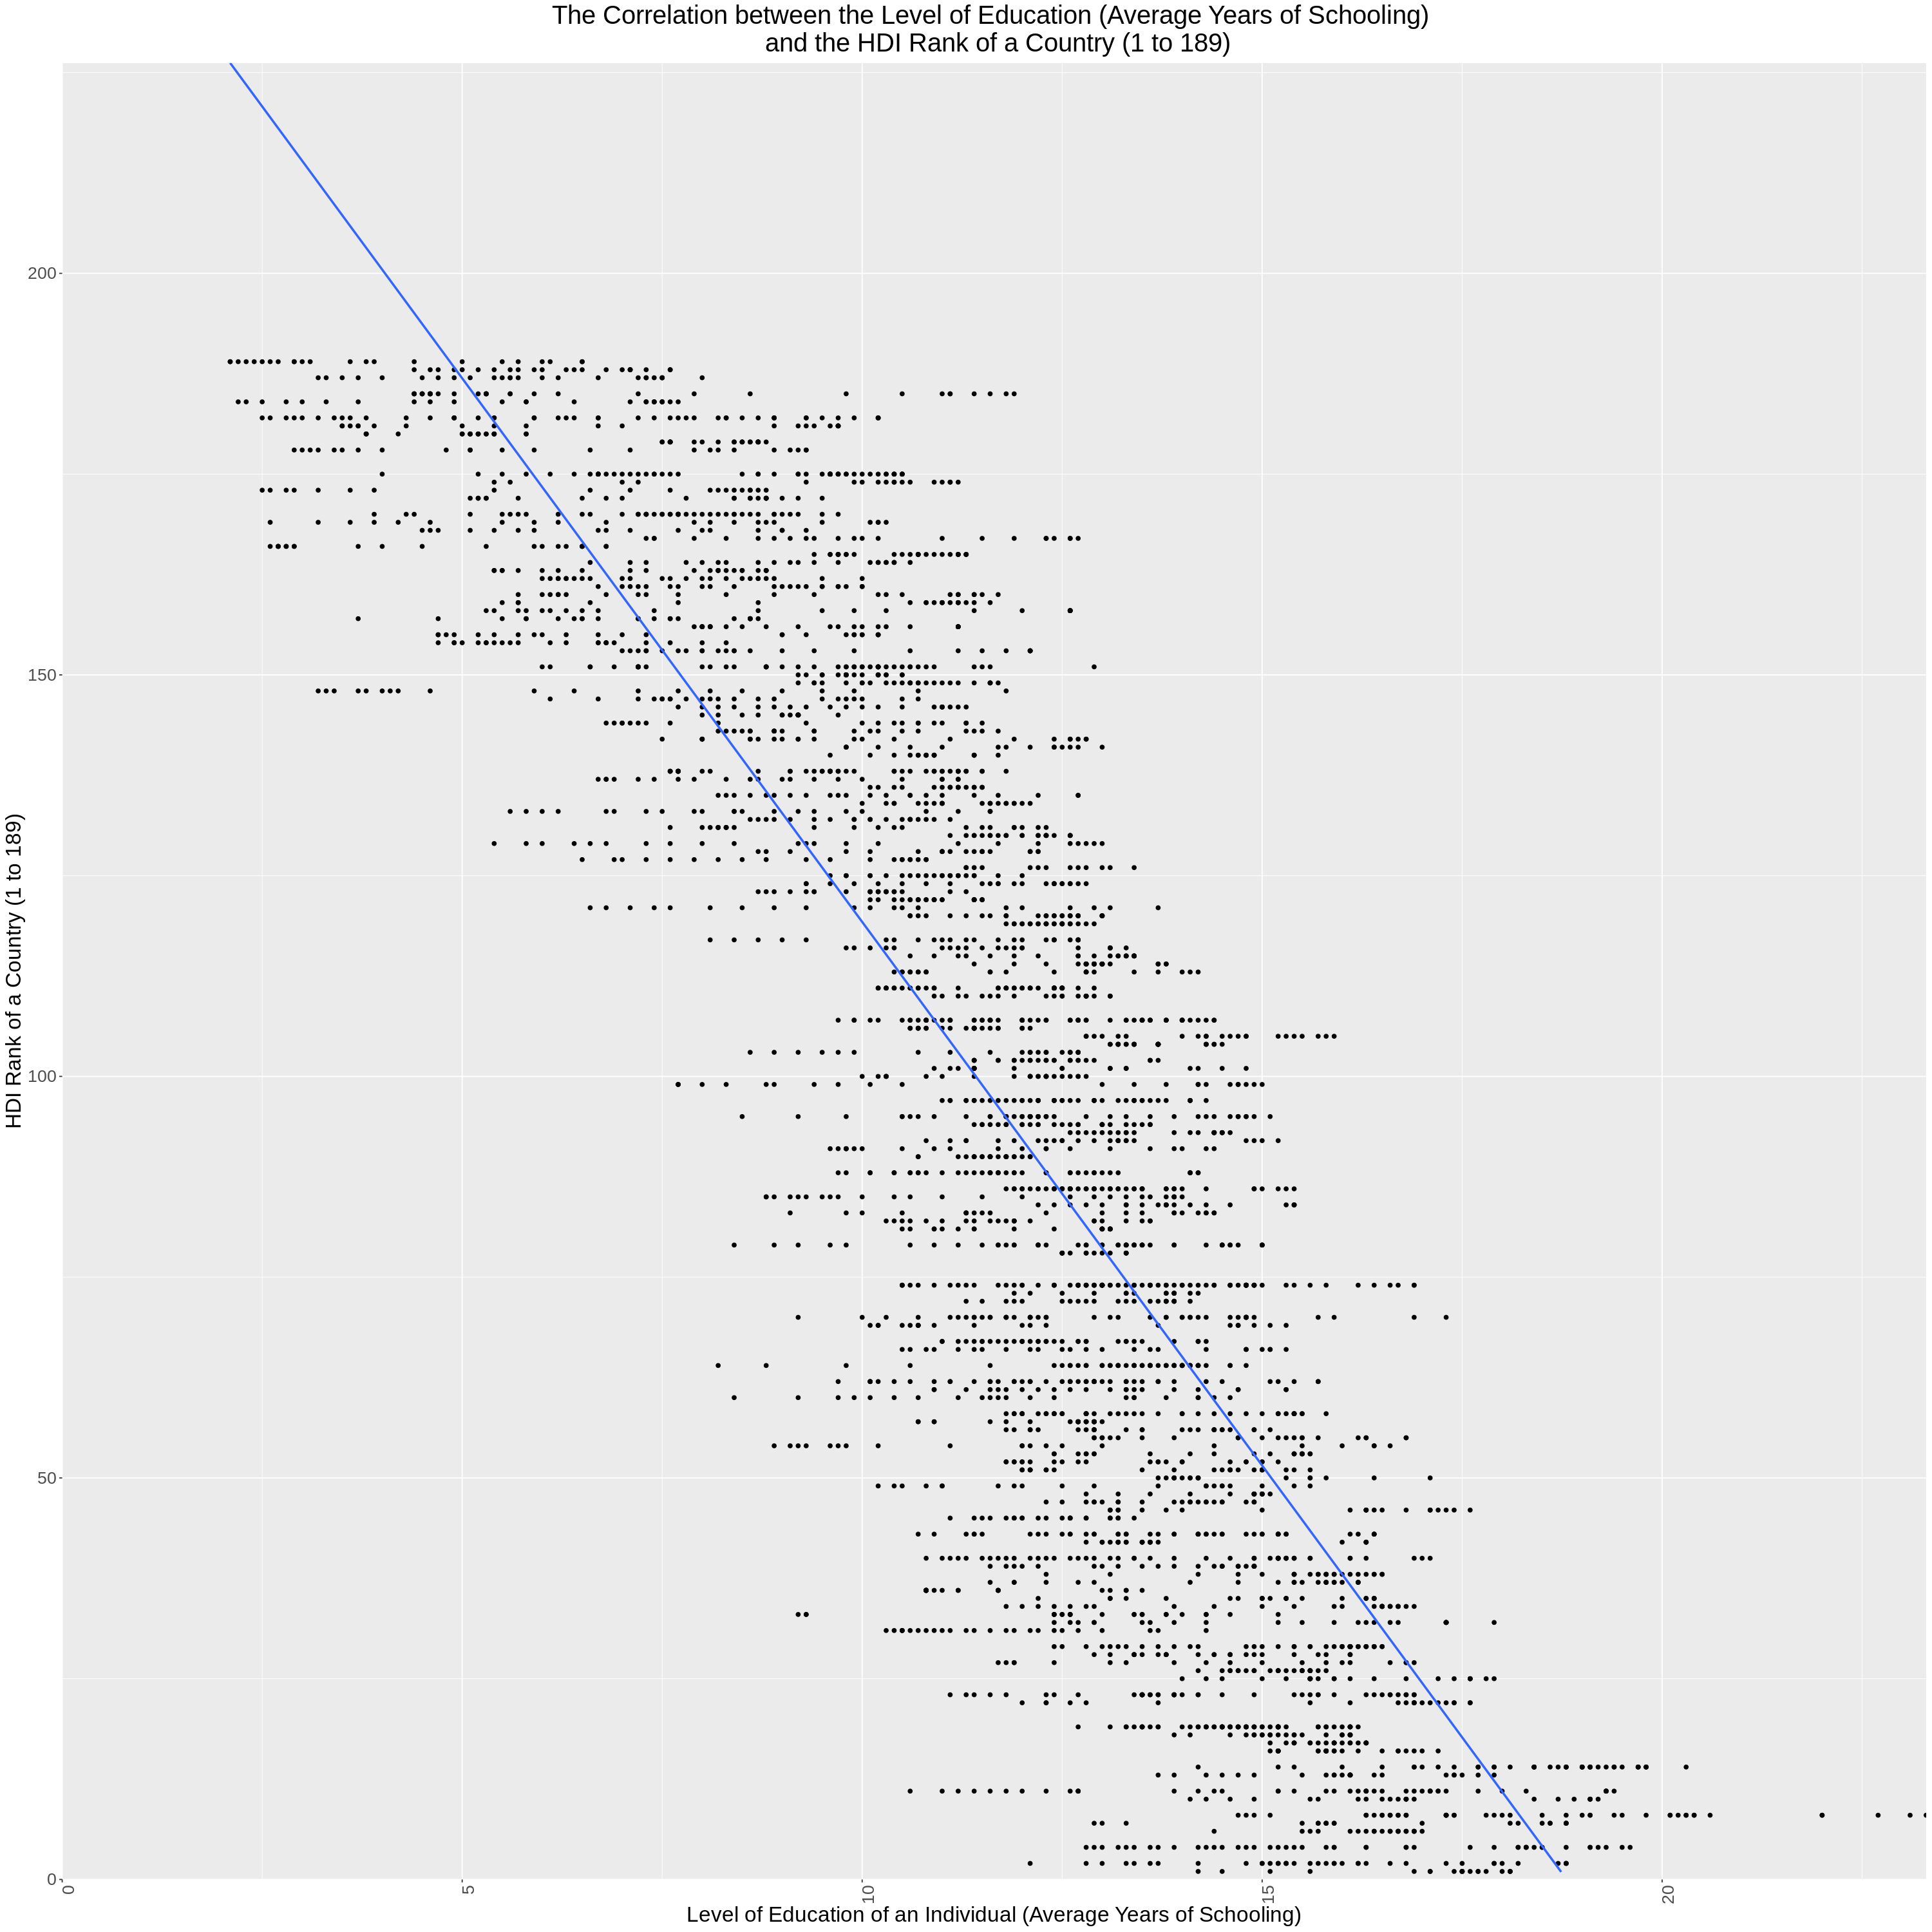

In [9]:
lm_predictions <- EYS_vs_HDI_Train %>%
    ggplot(aes(x = Average_Years_of_Schooling, y = HDI_Rank)) +
        geom_point() +          
        geom_smooth(method = "lm", se = FALSE) +
        labs(x= "Level of Education of an Individual (Average Years of Schooling)" , y = "HDI Rank of a Country (1 to 189)")+
                    ggtitle("The Correlation between the Level of Education (Average Years of Schooling) \n and the HDI Rank of a Country (1 to 189)")+
                    theme(axis.text.x = element_text(angle = 90, , hjust = 1),
                        text = element_text(size= 20))+
                    theme(plot.title = element_text(hjust = 0.5)) +
                    scale_x_continuous(expand = c(0,0), limits = c(0, NA))+
                    scale_y_continuous(expand = c(0,0), limits = c(0, NA))
lm_predictions
# This plots HDI ranks (y-axis) and average year of schooling (x-axis) to visualize the model prediction 
# as a straight line overlaid on the training dataset. It can be used in the further comparison with knn regression model. 

In [29]:
# Extracts the RMPSE value from the table and returns a single numerical value.

lm_rmse <- lm_fit %>%
                predict(EYS_vs_HDI_Train) %>%
                bind_cols(EYS_vs_HDI_Train) %>%
                metrics(truth = HDI_Rank, estimate = .pred) %>%
                filter(.metric == 'rmse') %>%
                select(.estimate) %>%
                pull()
lm_rmse


[1] 30.82769

In [11]:
EYS_vs_HDI_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                 set_engine("kknn") %>%
                 set_mode("regression")

# Sets the knn regression model specification.

EYS_vs_HDI_recipe <- recipe(HDI_Rank ~ Average_Years_of_Schooling, data = EYS_vs_HDI_Train) %>%
                   step_scale(all_predictors()) %>%
                   step_center(all_predictors())
EYS_vs_HDI_recipe

# Creates a recipe (HDI rank as the response variable and average year of schooling as the predictor) to preprocess our training data.

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          1

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [12]:
EYS_vs_HDI_vfold <- vfold_cv(EYS_vs_HDI_Train, v = 5, strata = HDI_Rank)

EYS_vs_HDI_workflow <- workflow() %>%
                     add_recipe(EYS_vs_HDI_recipe) %>%
                     add_model(EYS_vs_HDI_spec)
EYS_vs_HDI_workflow

# Performs a cross-validation with five folds, establishes a workflow analysis and fits the knn regression model for our training dataset.

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [13]:
gridvals <- tibble(neighbors = seq(1, 200))

# Creates a tibble with a sequence of values from 1 to 200 for running the cross validation.

EYS_vs_HDI_results <- EYS_vs_HDI_workflow %>%
                        tune_grid(resamples = EYS_vs_HDI_vfold, grid = gridvals) %>%
                        collect_metrics()
EYS_vs_HDI_results

# The resulting table contains important statistics such as k values ('neighbors' column), RMSPE values ('mean' column) 
# and the standard error which reflects how uncertain we are in the mean value.


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,40.5279259,5,0.94138837,Model001
1,rsq,standard,0.5105942,5,0.02318127,Model001
2,rmse,standard,36.3585620,5,1.14166736,Model002
2,rsq,standard,0.5812503,5,0.02702829,Model002
⋮,⋮,⋮,⋮,⋮,⋮,⋮
199,rmse,standard,29.2486428,5,0.39866774,Model199
199,rsq,standard,0.7136942,5,0.01127367,Model199
200,rmse,standard,29.2503078,5,0.39405803,Model200
200,rsq,standard,0.7136873,5,0.01115377,Model200


In [22]:
EYS_vs_HDI_min <- EYS_vs_HDI_results %>%
    filter(.metric == "rmse") %>%
    arrange(mean)  %>% 
    slice(1)
EYS_vs_HDI_min

# Finds the minimum RMSPE value to help us to find the best setting for the number of neighbors.

k_min <- EYS_vs_HDI_min %>%
            pull(neighbors)

# Extracts the best neighbors value.

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
129,rmse,standard,29.20794,5,0.3825253,Model129


In [39]:
EYS_vs_HDI_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
                            set_engine("kknn") %>%
                            set_mode("regression")

# Sets the knn regression model specification with k_min.

EYS_vs_HDI_best_fit <- workflow() %>%
                        add_recipe(EYS_vs_HDI_recipe) %>%
                        add_model(EYS_vs_HDI_best_spec) %>%
                        fit(data = EYS_vs_HDI_Train)

# Establishes a workflow analysis with the new model specification and fits the knn regression model for our training dataset.

EYS_vs_HDI_summary <- EYS_vs_HDI_best_fit %>% 
                       predict(EYS_vs_HDI_Train) %>%
                       bind_cols(EYS_vs_HDI_Train) %>%
                       metrics(truth = HDI_Rank, estimate = .pred)
EYS_vs_HDI_summary

knn_rmse <- EYS_vs_HDI_summary %>%
                filter(.metric == 'rmse') %>%
                select(.estimate) %>%
                pull()

knn_rmse

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,29.0516586
rsq,standard,0.7170358
mae,standard,22.7131218


[1] 29.05166

In [40]:
EYS_vs_HDI_summary_2 <- EYS_vs_HDI_best_fit %>% 
                       predict(EYS_vs_HDI_Test) %>%
                       bind_cols(EYS_vs_HDI_Test) %>%
                       metrics(truth = HDI_Rank, estimate = .pred)
EYS_vs_HDI_summary_2

knn_rmpse <- EYS_vs_HDI_summary_2 %>%
                filter(.metric == 'rmse') %>%
                select(.estimate) %>%
                pull()

knn_rmpse

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,29.5126239
rsq,standard,0.7130602
mae,standard,22.9707237


[1] 29.51262

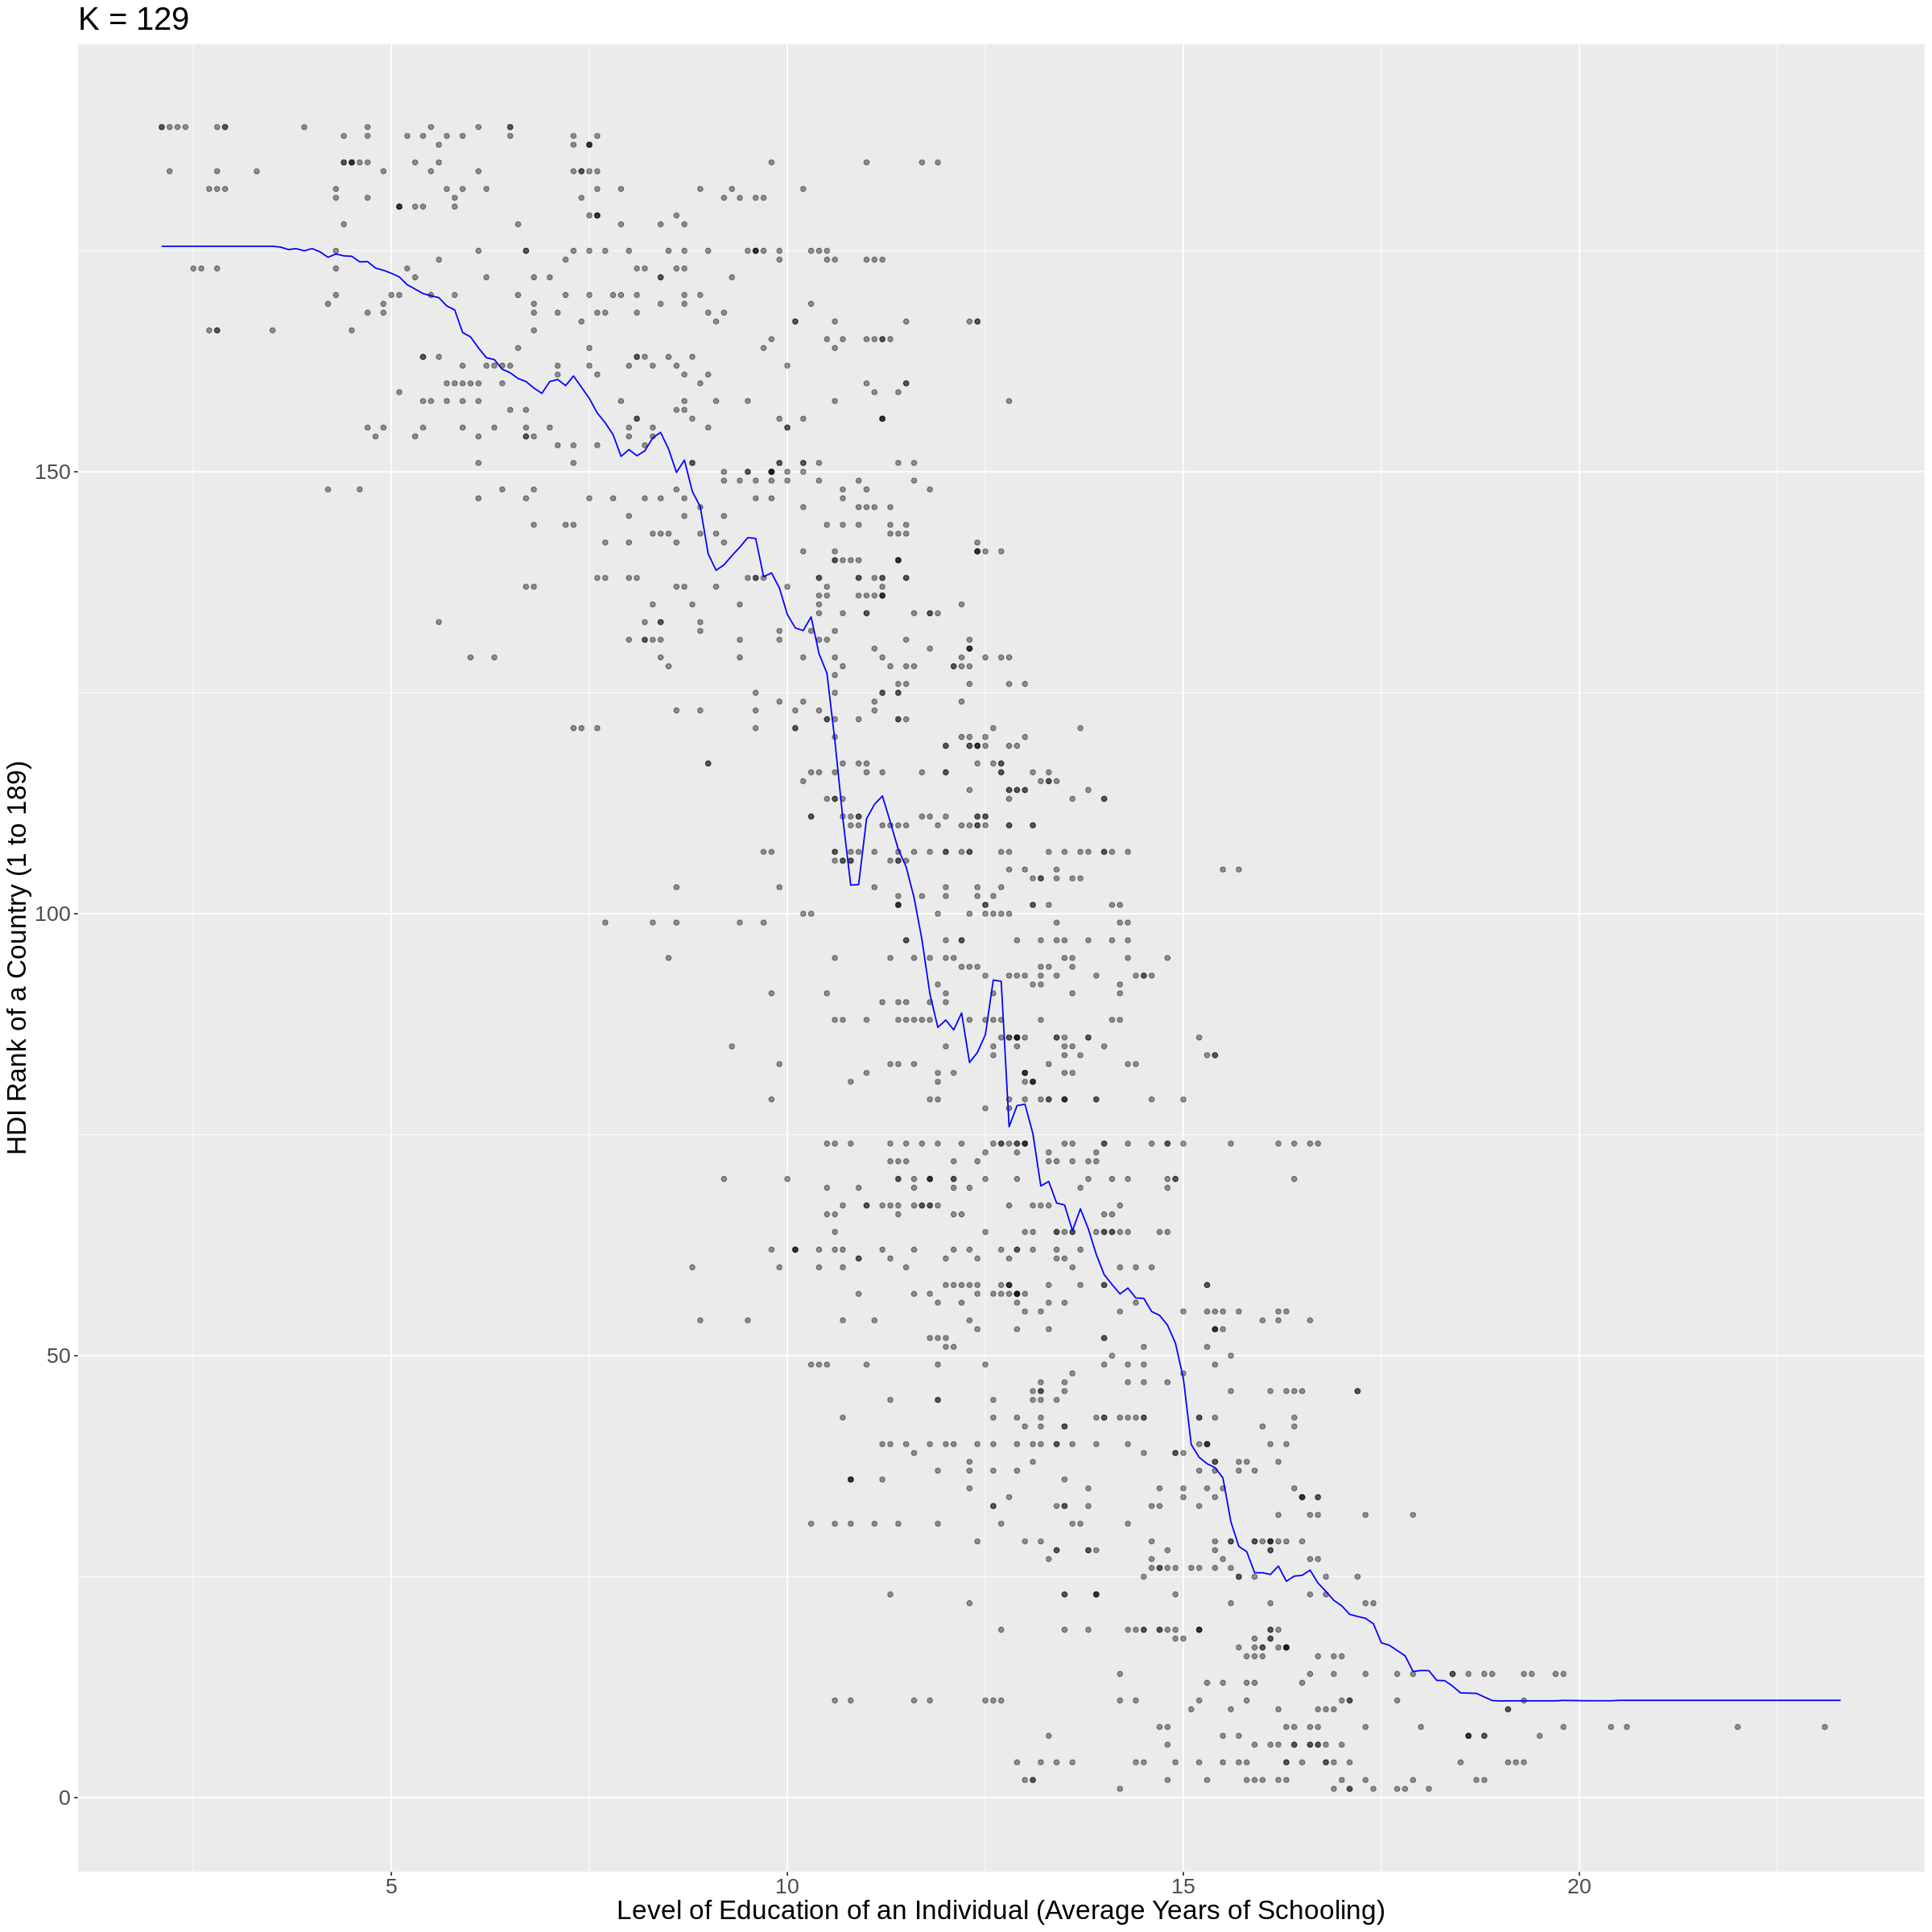

In [41]:
options(repr.plot.width = 20, repr.plot.height = 20)


EYS_vs_HDI_plot <- ggplot(EYS_vs_HDI_Test, aes(x = Average_Years_of_Schooling, y = HDI_Rank)) +
            geom_point(alpha = 0.4) +
            labs(x= "Level of Education of an Individual (Average Years of Schooling)" , y = "HDI Rank of a Country (1 to 189)")+ 
            geom_line(data = EYS_vs_HDI_preds, aes(x = Average_Years_of_Schooling, y = .pred), color = "blue") +
            ggtitle(paste0("K = ", k_min)) +
            theme(text = element_text(size = 20))
EYS_vs_HDI_plot